In [1]:
#Kütüphaneleri Ekleyelim
import numpy as np
import pandas as pd
#Görseleştirme için kullanılan kütüphaneler 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV #GridSearchCV sütunları parçalamak gerekirse diye kullanılır. 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv("kalp.csv")

In [3]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.head() # İlk beş veriri döndürür

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
data.columns.shape #Toplam sütun sayısını verir

(14,)

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
data.isnull().sum().sum()

0

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [12]:
data.duplicated().sum()

1

In [13]:
data.drop_duplicates(inplace=True) #Aynı olan verileri kaldır 

In [14]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
def kategorik_sayisal():
     print("{} -- {}".format(i,data[i].value_counts().shape[0])) #format kullanarak yazdır

for i in list(data.columns):
    kategorik_sayisal()

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


In [16]:
kategorik=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]
data_kat=data.loc[:,kategorik] #Dataframe oluştur
data_kat #kategorik verilerden Dataframe oluştur

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [120]:
#kategorik değişkenleri görüntüleyecek fonksiyon
def değişkenler(variable): #buradan bir değer gelicek 
    cat=data[variable]
    sayı=cat.value_counts() #değer sayısı
    plt.figure(figsize=(9,3))
    plt.bar(sayı.index,sayı)
    plt.xticks(sayı.index,sayı.index.values)
    plt.ylabel("frekans")
    plt.title(variable)
    plt.show()
    print(variable,sayı)

In [121]:
for i in kategorik:
    değişkenler(i)

KeyError: 'sex'

In [19]:
sayısal=["age","trtbps","chol","thalachh","oldpeak","output"]
data_sayısal=data.loc[:,sayısal] #Dataframe oluştur
data_sayısal

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


In [20]:
data_sayısal.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output'], dtype='object')

<AxesSubplot:>

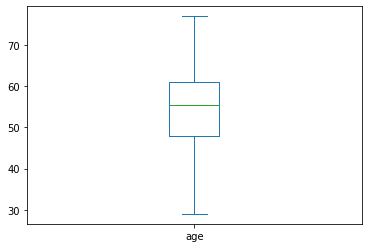

In [21]:
data["age"].plot(kind='box')

In [92]:
Q1=data["age"].quantile(0.25)

In [95]:
Q3=data["age"].quantile(0.75)

In [96]:
IQR=Q3-Q1

In [97]:
print(Q1)

48.0


In [98]:
print(Q3)

61.0


In [99]:
print(IQR)

13.0


In [100]:
altSınırı=Q1-1.5*IQR
ustSınırı=Q3+1.5*IQR

In [103]:
askucuk=data[data["age"]<altSınırı]["age"]
print(askucuk)

Series([], Name: age, dtype: int64)


In [104]:
usbuyuk=data[data["age"]<ustSınırı]["age"]
print(usbuyuk)

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 302, dtype: int64


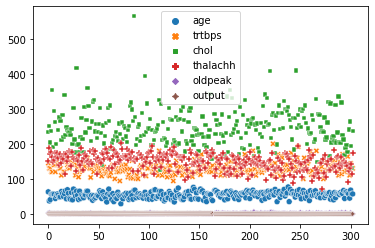

In [107]:
sns.scatterplot(data=data_sayısal)
plt.show()

In [118]:
aykırı=pd.DataFrame(data=data_sayısal)

In [119]:
aykırı

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


<AxesSubplot:>

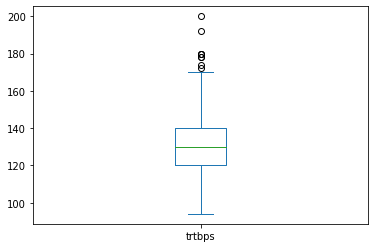

In [22]:
data["trtbps"].plot(kind='box')

<AxesSubplot:>

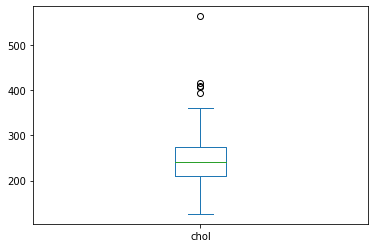

In [23]:
data["chol"].plot(kind='box')

<AxesSubplot:>

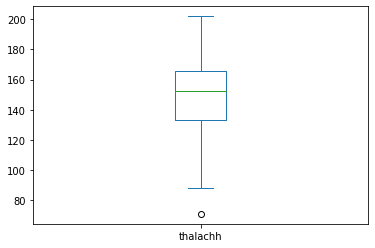

In [24]:
data["thalachh"].plot(kind='box')

<AxesSubplot:>

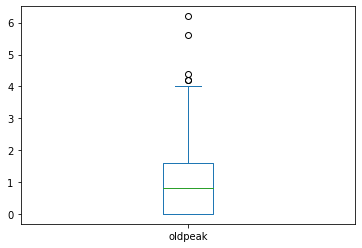

In [25]:
data["oldpeak"].plot(kind='box')

<AxesSubplot:>

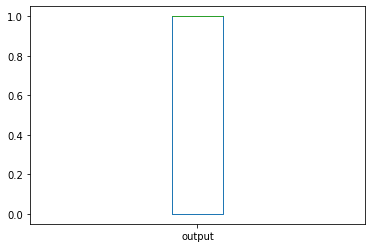

In [26]:
data["output"].plot(kind='box')

<AxesSubplot:>

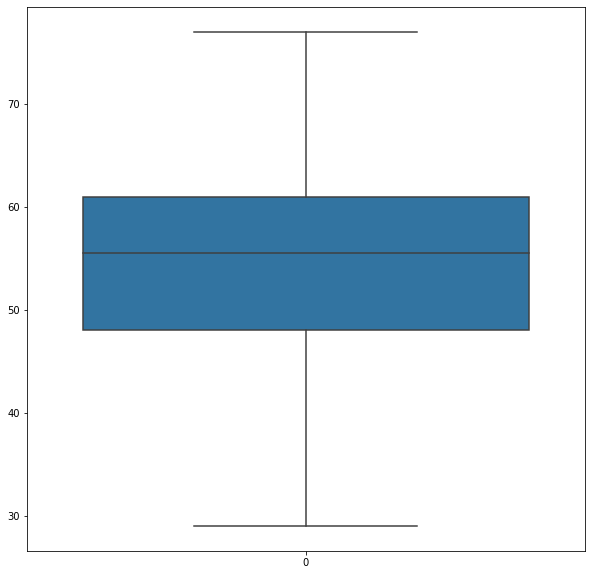

In [61]:
plt.figure(figsize=(10,10)) #boyutu verir
sns.boxplot(data=data.age)

<AxesSubplot:>

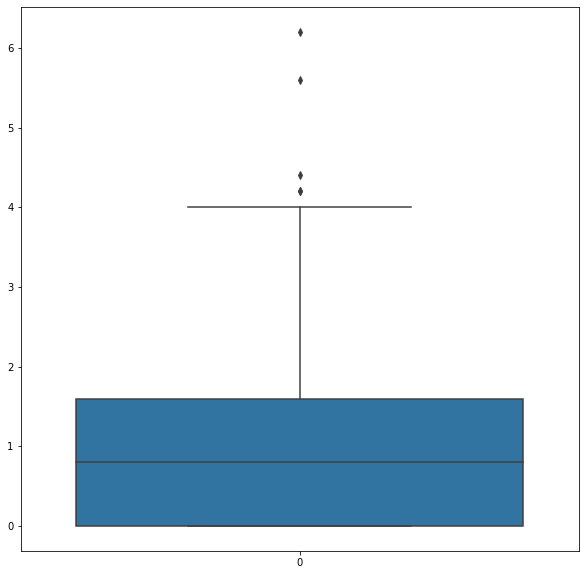

In [62]:
plt.figure(figsize=(10,10)) #boyutu verir
sns.boxplot(data=data.oldpeak)

In [ ]:
sayısal=["age","trtbps","chol","thalachh","oldpeak","output"]
data_sayısal=data.loc[:,sayısal] #Dataframe oluştur
data_sayısal

<AxesSubplot:>

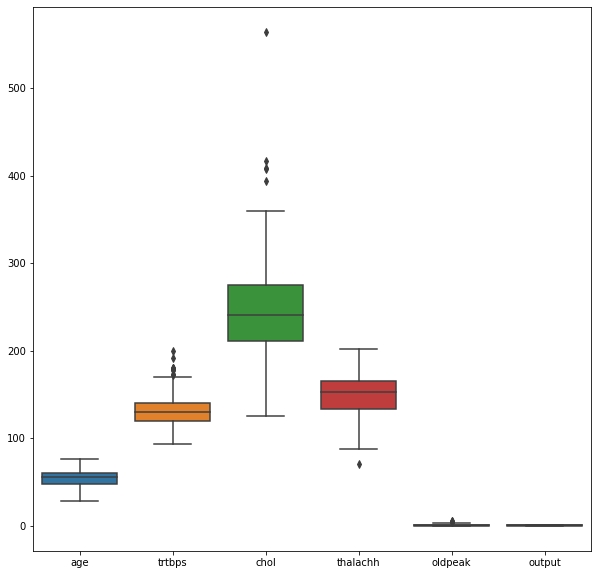

In [65]:
plt.figure(figsize=(10,10)) #boyutu verir
sns.boxplot(data=data_sayısal)

In [69]:
data_sayısal.mean()

age          54.420530
trtbps      131.602649
chol        246.500000
thalachh    149.569536
oldpeak       1.043046
output        0.543046
dtype: float64

In [70]:
data_sayısal.mean().mean()

97.27980132450334

In [71]:
data_sayısal.describe()

,age,trtbps,chol,thalachh,oldpeak,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000


In [77]:
data_sayısal[vector]=data_sayısal.mean()
ç

NameError: name 'vector' is not defined

In [50]:
sayısal=["age","trtbps","chol","thalachh","oldpeak","output"]
data_sayısal=data.loc[:,sayısal] #Dataframe oluştur
data_sayısal

,age,trtbps,chol,thalachh,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


<AxesSubplot:>

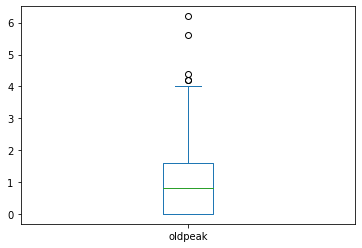

In [51]:
data["oldpeak"].plot(kind='box')

In [52]:
data.mean()

age           54.420530
trtbps       131.602649
chol         246.500000
thalachh     149.569536
oldpeak        1.043046
output         0.543046
sex_1          0.682119
cp_1           0.165563
cp_2           0.284768
cp_3           0.076159
fbs_1          0.149007
restecg_1      0.500000
restecg_2      0.013245
exng_1         0.327815
slp_1          0.463576
slp_2          0.466887
caa_1          0.215232
caa_2          0.125828
caa_3          0.066225
caa_4          0.013245
thall_1        0.059603
thall_2        0.546358
thall_3        0.387417
dtype: float64

In [53]:
data.mean().mean()

25.574863230636346

In [54]:
data.describe()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046,0.682119,0.165563,0.284768,0.076159,...,0.327815,0.463576,0.466887,0.215232,0.125828,0.066225,0.013245,0.059603,0.546358,0.387417
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970,0.466426,0.372305,0.452053,0.265693,...,0.470196,0.499499,0.499730,0.411665,0.332206,0.249088,0.114512,0.237142,0.498673,0.487969
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


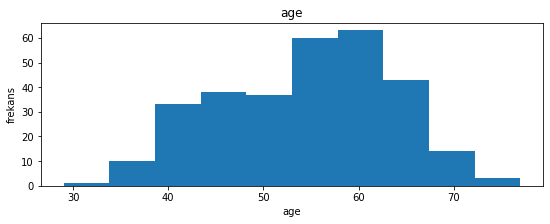

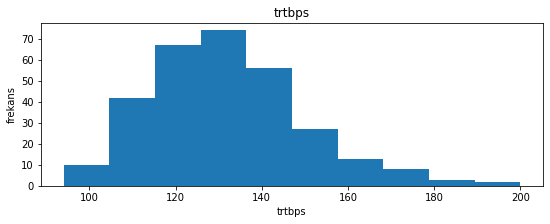

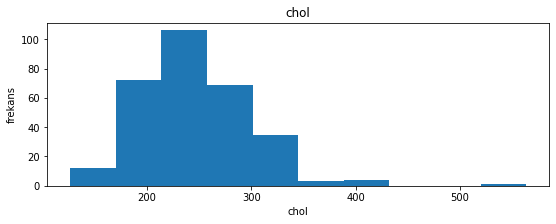

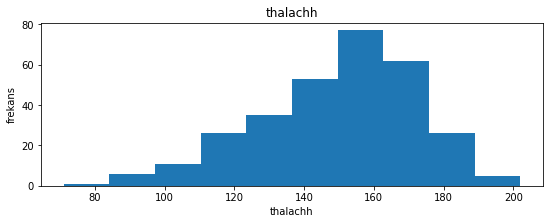

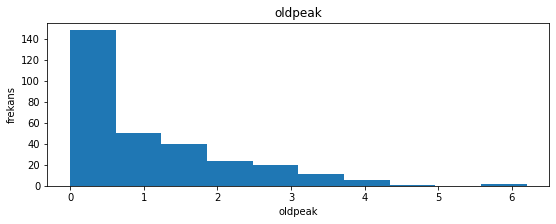

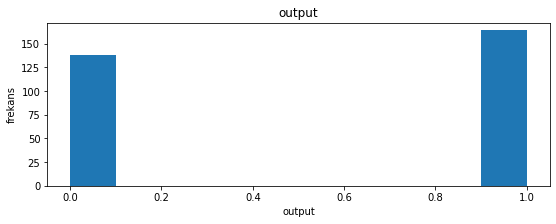

In [27]:
def hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable])
    plt.xlabel(variable)
    plt.ylabel("frekans")
    plt.title(variable)
    plt.show()

for i in sayısal:
    hist(i)

In [28]:
yeniData=pd.concat([data_sayısal,data_kat],axis=1)

In [29]:
yeniData

,age,trtbps,chol,thalachh,oldpeak,output,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,63,145,233,150,2.3,1,1,3,1,0,0,0,0,1,1
1,37,130,250,187,3.5,1,1,2,0,1,0,0,0,2,1
2,41,130,204,172,1.4,1,0,1,0,0,0,2,0,2,1
3,56,120,236,178,0.8,1,1,1,0,1,0,2,0,2,1
4,57,120,354,163,0.6,1,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,1,1,1,0,3,0
299,45,110,264,132,1.2,0,1,3,0,1,0,1,0,3,0
300,68,144,193,141,3.4,0,1,0,1,1,0,1,2,3,0
301,57,130,131,115,1.2,0,1,0,0,1,1,1,1,3,0


C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


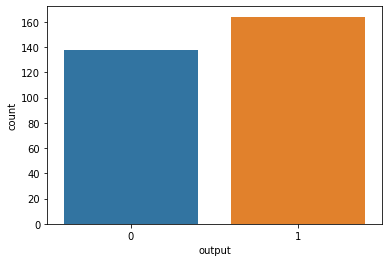

In [30]:
sns.countplot("output",data=data)
plt.show()

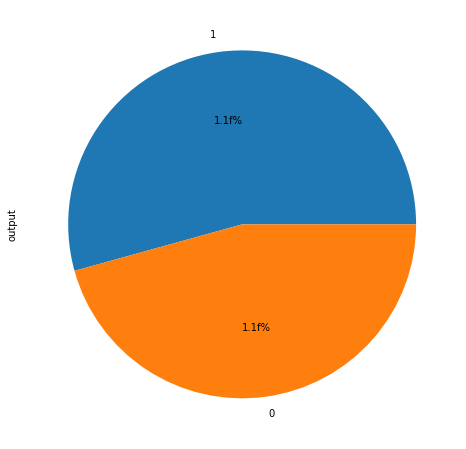

In [31]:
data["output"].value_counts().plot.pie(autopct='1.1f%%',figsize=(10,8)) #sayıyı al ve pasta grafiğinde çiz,boyut belirt
plt.show()

In [32]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


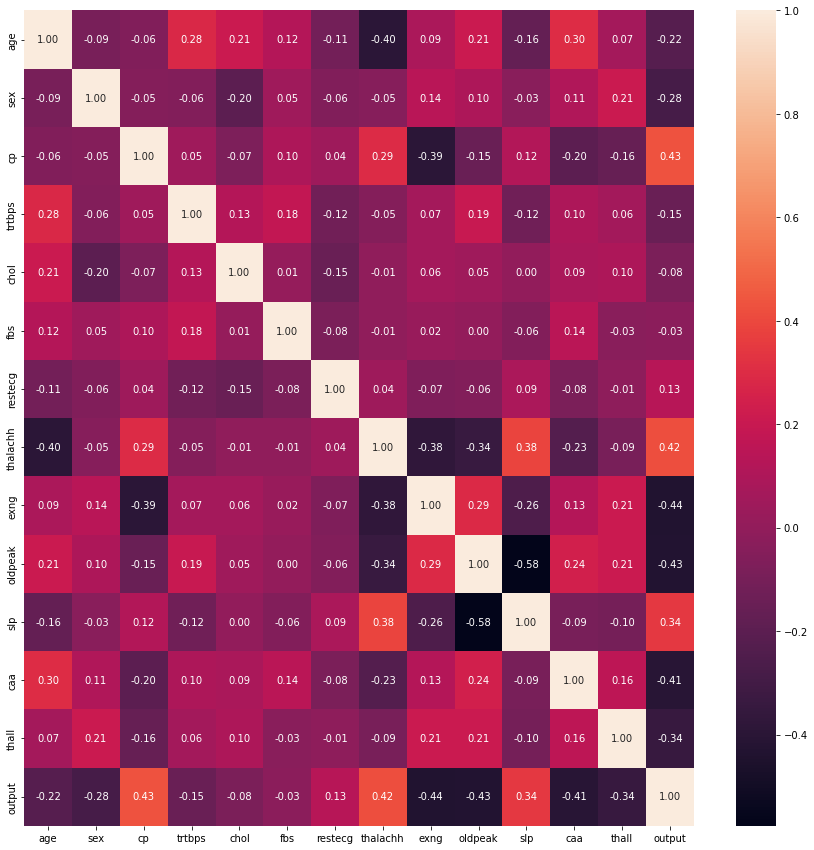

In [33]:
plt.figure(figsize=(15,15)) #boyutu verir
korelasyon=data.corr() #verilerin birbiriyle olan ilişkisini verir
sns.heatmap(korelasyon,annot=True,fmt='.2f')
plt.show()

In [34]:
#Buraya kadar olan kısım modelimizi tanımamıza yardımcı olmak için yapılan işlemlerr.

In [35]:
data=pd.get_dummies(data,columns=kategorik[:-1],drop_first=True)
# drop_first=True , eski değerleri atmasını ister 
data.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [36]:
X=data.drop(["output"],axis=1)

In [37]:
X

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [38]:
y=data[["output"]]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [39]:
#normalizasyon işlemi yapılır
scaler=StandardScaler()
X[sayısal[:-1]]=scaler.fit_transform(X[sayısal[:-1]])
X

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,-1.042904,-1.232023,0.338703,-0.768384,0.135360,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503322,0.707035,-1.035462,-0.374779,2.032684,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,0.285561,-0.091401,-2.235438,-1.511859,0.135360,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=44)
knn=KNeighborsClassifier() #Yapıcı metodu çağrılır
knn.fit(X_train,y_train) #metotun çalıştığını gösterir

C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [41]:
tahmin=knn.predict(X_test) 
tahmin

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [42]:
y_test #gerçek değerler 

,output
300,0
213,0
54,1
88,1
44,1
...,...
255,0
226,0
23,1
302,0


In [43]:
sonuc=knn.score(X_test,y_test)
print("model başarısı:",sonuc)

model başarısı: 0.8351648351648352


In [44]:
k_değerleri=[]
for i in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    k_değerleri.append(knn.score(X_test,y_test))

C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:2

In [45]:
k_değerleri

[0.7582417582417582,
 0.8131868131868132,
 0.8351648351648352,
 0.8681318681318682,
 0.8351648351648352,
 0.8241758241758241,
 0.8351648351648352,
 0.8241758241758241,
 0.8351648351648352,
 0.8241758241758241]

In [46]:
sınıflandırmaRaporu=classification_report(y_test,tahmin)
print(sınıflandırmaRaporu)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        46
           1       0.81      0.87      0.84        45

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91



In [47]:
doğrulukDegeri=accuracy_score(y_test,tahmin)
print(doğrulukDegeri)

0.8351648351648352


In [48]:
hataMatrisi=confusion_matrix(tahmin,y_test)
print(hataMatrisi)

[[37  6]
 [ 9 39]]


<AxesSubplot:>

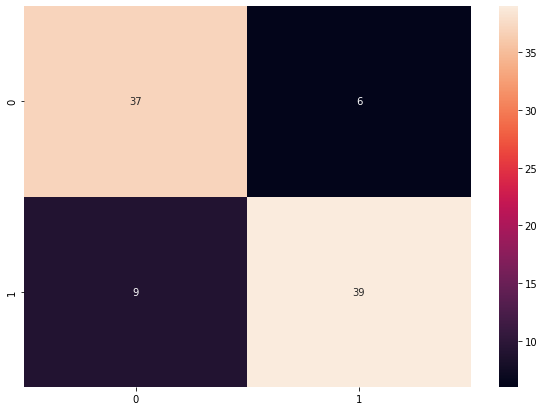

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(hataMatrisi,annot=True,fmt=".0f")

In [ ]:
#farklı algoritmalar denenerek en iyi doğruluk değerini bulan algoritma secilir 

              precision    recall  f1-score   support

           0       0.92      0.78      0.85        46
           1       0.81      0.93      0.87        45

    accuracy                           0.86        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91

Lojistik Regresyon doğruluk değeri: 0.8571428571428571


C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


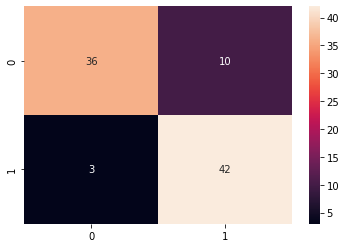

In [78]:
#Logistic Regresyon Algoritması 
logr=LogisticRegression() #yapıcı metot çağrılır
logr.fit(X_train,y_train)

y_pred=logr.predict(X_test) #tahmin et

print(classification_report(y_test,y_pred)) #sınıflandırma raporu 

logDogruluk=accuracy_score(y_test,y_pred)

print("Lojistik Regresyon doğruluk değeri:",logDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f') #annot=değerleri yazsın diye verilir
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        46
           1       0.80      0.82      0.81        45

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Decision Tree doğruluk değeri: 0.8131868131868132


C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


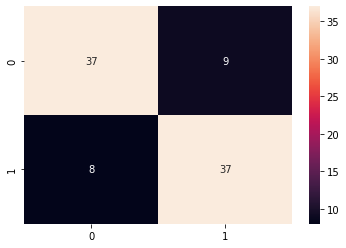

In [80]:
#Destek vektör Algoritması 
from sklearn.svm import SVC #destek vektör algoritmaları
dvm =SVC() #yapıcı metot çağrılır,parametre alabilir 
dvm.fit(X_train,y_train) #eğitim datamı fit et 

y_pred=dvm.predict(X_test) #tahmin et

print(classification_report(y_test,y_pred)) #sınıflandırma raporu 

dvmDogruluk=accuracy_score(y_test,y_pred)

print("Decision Tree doğruluk değeri:",dvmDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f') #annot=değerleri yazsın diye verilir
plt.show()

C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.89      0.91        46
           1       0.89      0.93      0.91        45

    accuracy                           0.91        91
   macro avg       0.91      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91

Gaussian NB doğruluk: 0.9120879120879121


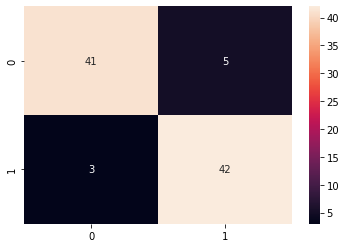

In [81]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

gnbDogruluk=accuracy_score(y_test,y_pred)
print("Gaussian NB doğruluk:", gnbDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.78      0.85        46
           1       0.81      0.93      0.87        45

    accuracy                           0.86        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91

Decision Tree doğruluk değeri: 0.8571428571428571


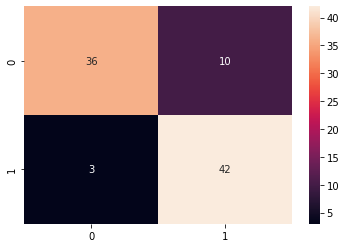

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier() #yapıcı metot çağrılır
dt.fit(X_train,y_train) #eğitim datamı fit et 

y_pred=logr.predict(X_test) #tahmin et

print(classification_report(y_test,y_pred)) #sınıflandırma raporu 

dtDogruluk=accuracy_score(y_test,y_pred)

print("Decision Tree doğruluk değeri:",dtDogruluk)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f') #annot=değerleri yazsın diye verilir
plt.show()

In [86]:
model=KNeighborsClassifier() #yapıcı metodu çağır 
model.fit(X_train,y_train) #eğitim datasını fit et,eğitim ve test datasının eğitim işlemini tamamla

#tahmin yapma zamanı 
#x_testi tahmin edicez, y_test ise gerçek değerlerimiz gibi düşün
#yani veriyi bi şekilde tahmin edicem ve daha sonra y_test ile karşılaştırmasını yapıcam

y_pred=model.predict(X_test) #tahmin edilen değer

print(classification_report(y_test,y_pred)) #sınıflandırma raporunu getir
print(confusion_matrix(y_test,y_pred)) #hata matrisini çizdir 

knnDogruluk=accuracy_score(y_test,y_pred) #test datama göre tahmin edilen değerlerimin sonuçlarını verir
print("knn doğruluk değeri:",knnDogruluk) #doğruluk değerini yazdır 

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        46
           1       0.81      0.87      0.84        45

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91

[[37  9]
 [ 6 39]]
knn doğruluk değeri: 0.8351648351648352


C:\Users\Gülşen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [87]:
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB'],
                        'Score':[logDogruluk,dtDogruluk,dvmDogruluk,knnDogruluk,gnbDogruluk]})

In [88]:
modeller

,Model,Score
0,Logistik Regresyon,0.857143
1,Karar Ağaçları,0.857143
2,Destek Vektör Makinesi,0.813187
3,K-en yakın komşu,0.835165
4,Gaussian NB,0.912088


In [89]:
modeller.sort_values(by='Score',ascending=False) #büyükten küçüğe sıralar 

,Model,Score
4,Gaussian NB,0.912088
0,Logistik Regresyon,0.857143
1,Karar Ağaçları,0.857143
3,K-en yakın komşu,0.835165
2,Destek Vektör Makinesi,0.813187


<BarContainer object of 5 artists>

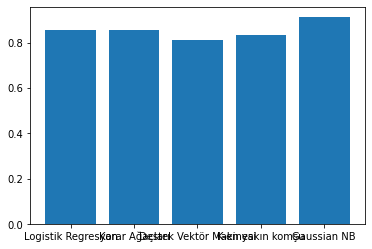

In [90]:
plt.bar(modeller.Model,modeller.Score)